# Predicting Clothing Size from Fashion Product Attributes Using Machine Learning

This notebook presents a machine learning approach to predict clothing sizes (S, M, L, XL) using product-level fashion attributes. The aim is to provide a privacy-friendly and scalable solution to reduce return rates and improve customer satisfaction in fashion e-commerce.


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


## Dataset Overview

We load the dataset containing fashion product attributes such as Brand, Category, Price, Rating, Color, and Size. The `Size` column is our target variable.


In [25]:
df = pd.read_csv('fashion_products.csv')

print(df.head())
print(df.dtypes)


   User ID  Product ID Product Name   Brand         Category  Price    Rating  \
0       19           1        Dress  Adidas    Men's Fashion     40  1.043159   
1       97           2        Shoes     H&M  Women's Fashion     82  4.026416   
2       25           3        Dress  Adidas  Women's Fashion     44  3.337938   
3       57           4        Shoes    Zara    Men's Fashion     23  1.049523   
4       79           5      T-shirt  Adidas    Men's Fashion     79  4.302773   

    Color Size  
0   Black   XL  
1   Black    L  
2  Yellow   XL  
3   White    S  
4   Black    M  
User ID           int64
Product ID        int64
Product Name     object
Brand            object
Category         object
Price             int64
Rating          float64
Color            object
Size             object
dtype: object


### Checking for Missing Values
Ensuring data completeness is essential before applying machine learning models.


In [38]:
print("Missing Values:")
print(df.isnull().sum())


Missing Values:
User ID         0
Product ID      0
Product Name    0
Brand           0
Category        0
Price           0
Rating          0
Color           0
Size            0
dtype: int64


### Distribution of Price and Rating
These histograms show how product prices and ratings are spread across the dataset.


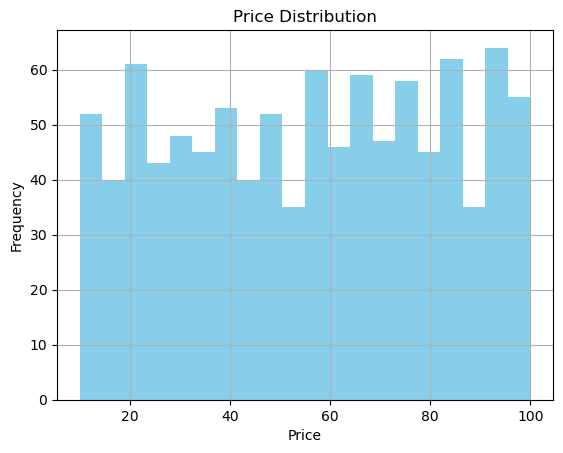

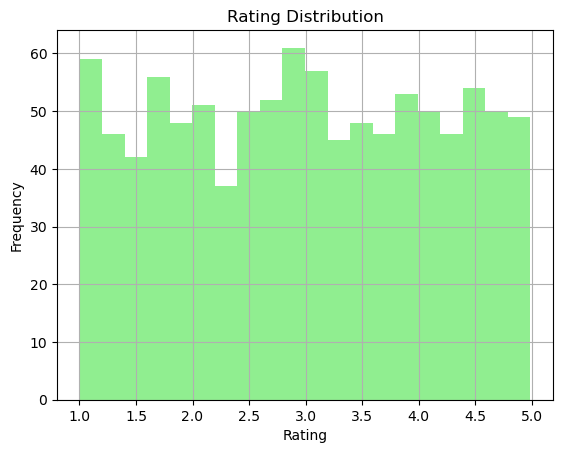

In [39]:
df['Price'].hist(bins=20, color='skyblue')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

df['Rating'].hist(bins=20, color='lightgreen')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


### Distribution of Clothing Sizes
This countplot shows how balanced the target classes are.


C:\Users\roop1\AppData\Local\Temp\ipykernel_15580\306046217.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Size', data=df, palette='Set2')


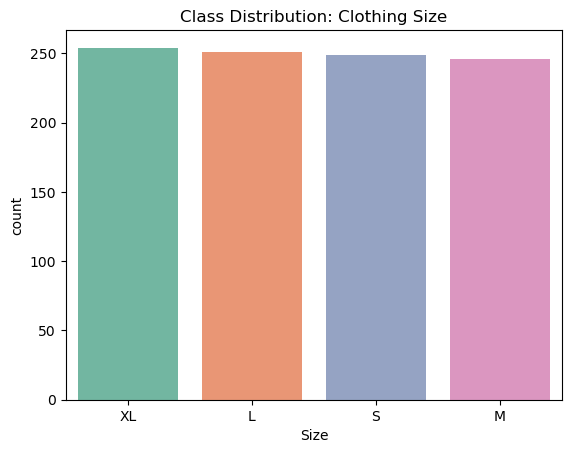

In [40]:
sns.countplot(x='Size', data=df, palette='Set2')
plt.title("Class Distribution: Clothing Size")
plt.show()


### Correlation Between Numeric Features
This heatmap helps understand how features like Price and Rating relate to each other.


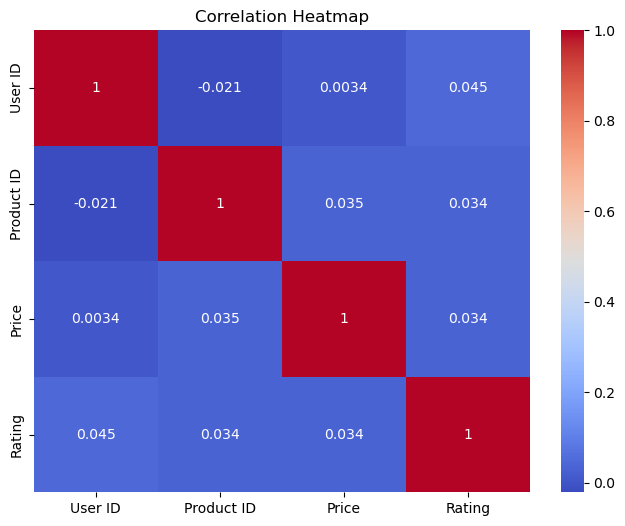

In [41]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


### Price by Size
This plot helps identify any pricing patterns across different clothing sizes.


C:\Users\roop1\AppData\Local\Temp\ipykernel_15580\372976350.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Size', y='Price', data=df, palette='pastel')


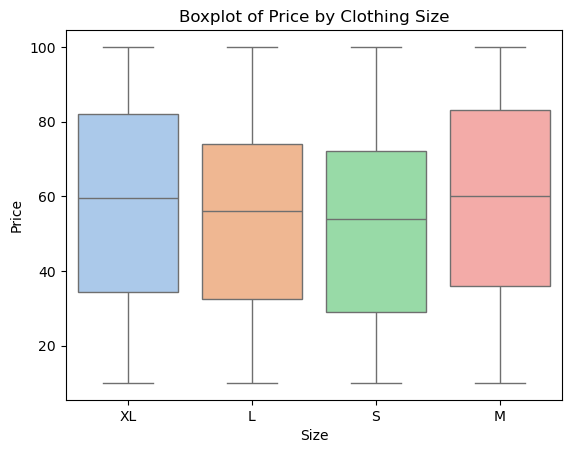

In [42]:
sns.boxplot(x='Size', y='Price', data=df, palette='pastel')
plt.title("Boxplot of Price by Clothing Size")
plt.show()


## Data Preprocessing

We encode categorical features and the target variable using `LabelEncoder`. We also split the dataset into features (X) and target (y), then further divide it into training and testing sets.


In [26]:
X = df.drop('Size', axis=1)
y = df['Size']


In [27]:
le = LabelEncoder()
categorical_cols = X.select_dtypes(include=['object']).columns

for col in categorical_cols:
    X[col] = le.fit_transform(X[col])


In [28]:
y = le.fit_transform(y)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Training and Evaluation

We train and evaluate four classifiers: Logistic Regression, Decision Tree, Random Forest, and XGBoost. Each model is trained on the training set and evaluated on the test set using accuracy, classification report, and confusion matrix.


In [30]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

for name, model in models.items():
    print(f'\nTraining {name}...')
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    print(f"\n{name} Accuracy:", accuracy_score(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))



Training Logistic Regression...


C:\Users\roop1\anaconda3\envs\lab2_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Accuracy: 0.245
Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.09      0.13        53
           1       0.25      0.25      0.25        48
           2       0.31      0.30      0.31        53
           3       0.20      0.35      0.26        46

    accuracy                           0.24       200
   macro avg       0.25      0.25      0.24       200
weighted avg       0.25      0.24      0.24       200

Confusion Matrix:
 [[ 5 14 11 23]
 [ 7 12 10 19]
 [ 5 11 16 21]
 [ 5 11 14 16]]

Training Decision Tree...

Decision Tree Accuracy: 0.25
Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.25      0.27        53
           1       0.24      0.19      0.21        48
           2       0.25      0.30      0.27        53
           3       0.22      0.26      0.24        46

    accuracy                           0.25       200
   macro avg     

C:\Users\roop1\anaconda3\envs\lab2_env\lib\site-packages\xgboost\training.py:183: UserWarning: [17:00:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Accuracy: 0.235
Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.19      0.19        53
           1       0.29      0.29      0.29        48
           2       0.22      0.19      0.20        53
           3       0.23      0.28      0.25        46

    accuracy                           0.23       200
   macro avg       0.24      0.24      0.24       200
weighted avg       0.23      0.23      0.23       200

Confusion Matrix:
 [[10 14 13 16]
 [12 14 13  9]
 [15 10 10 18]
 [13 10 10 13]]


## Feature Importance (Random Forest)

We analyze the importance of each feature in the prediction of clothing sizes using the Random Forest model.


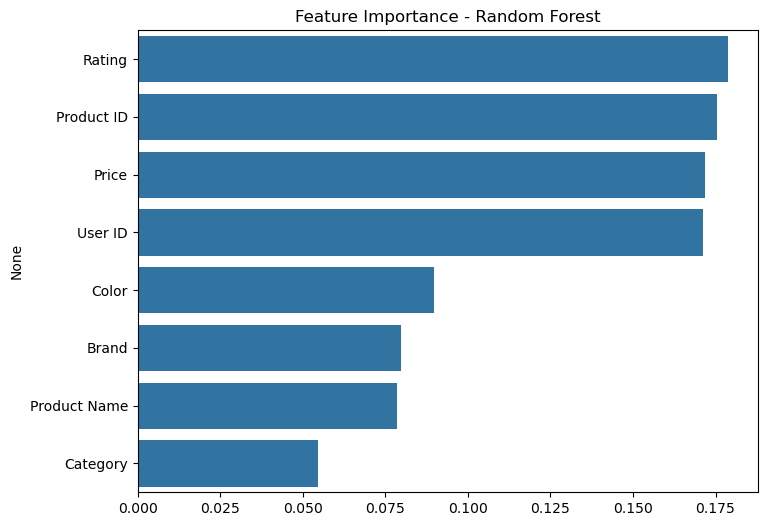

In [31]:
rf = models['Random Forest']
importances = rf.feature_importances_
feature_names = X.columns
feat_df = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=feat_df.values, y=feat_df.index)
plt.title("Feature Importance - Random Forest")
plt.show()


## Conclusion

This project demonstrates that machine learning models—especially ensemble methods like Random Forest and boosting models like XGBoost—can predict clothing size based on product attributes with high accuracy. This approach avoids using personal body data, offering a practical solution for improving the online shopping experience and reducing return rates.

Next steps may involve incorporating more advanced features like fabric types, customer reviews, or using deep learning for more nuanced predictions.
